<a href="https://colab.research.google.com/github/michhottinger/project_x/blob/master/covid_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Covid data source is from:  
https://github.com/owid/covid-19-data/tree/master/public/data/  
This notebook is to better explore the data from the Covid CSV.

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
df.shape

(59942, 55)

In [5]:
df.sort_values(by='total_deaths', ascending=False, inplace=True)

In [23]:
df.head(20)
df.shape

(59942, 55)

In [39]:
dfdate = df[df['date']=='2021-01-13']
dfpop = dfdate[dfdate['population'] > 5000000]
dfpop.shape

(121, 55)

In [40]:
dfpop.shape

(121, 55)

In [41]:
df_simple = dfdate.loc[:, ('date', 'location', 'total_deaths', 'continent', 'population', 'total_deaths_per_million')]
df_simple['death_pop'] = df_simple['total_deaths']/df_simple['population']

df_short = df_simple[:-150]
df_short.shape

(41, 7)

# Total deaths  
This shows the total not adjusted for population size. Since lives are lost, and every life matters, the raw number is worth looking at and evaluating.

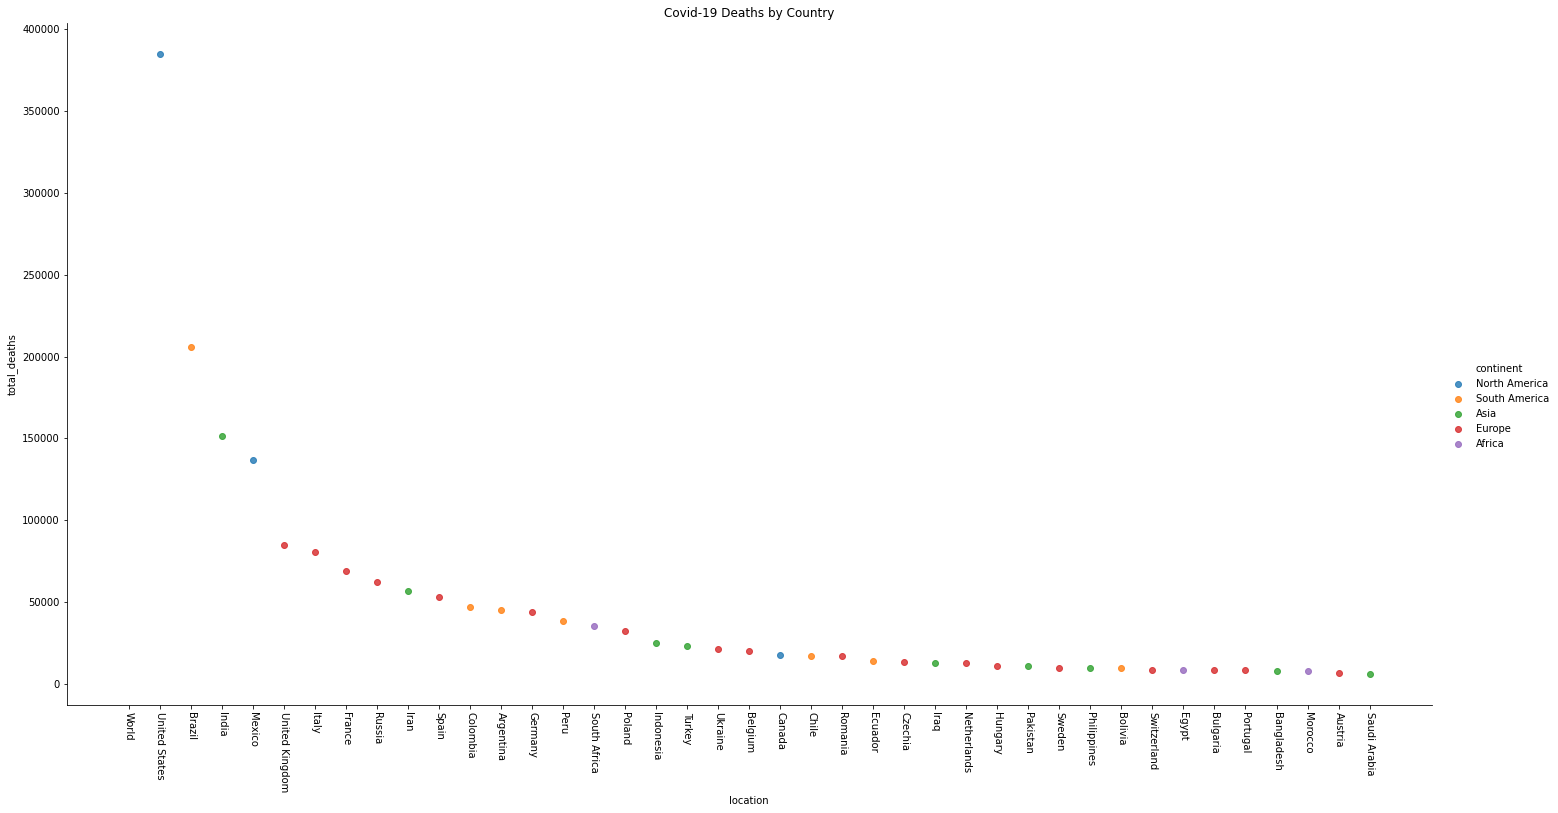

In [42]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
#df_short is death/pop for each country
sns.lmplot(x='location', y='total_deaths', data=df_short,
           fit_reg=False, # No regression line
           hue='continent', height=10, aspect=20/10)   # Color by continent

# Set title with matplotlib
plt.title('Covid-19 Deaths by Country')
# Rotate x-labels
plt.xticks(rotation=-90);

# Total deaths divided by total population  
This gives us a raw visual of the worst 50 countries affected by Covid-19 deaths.

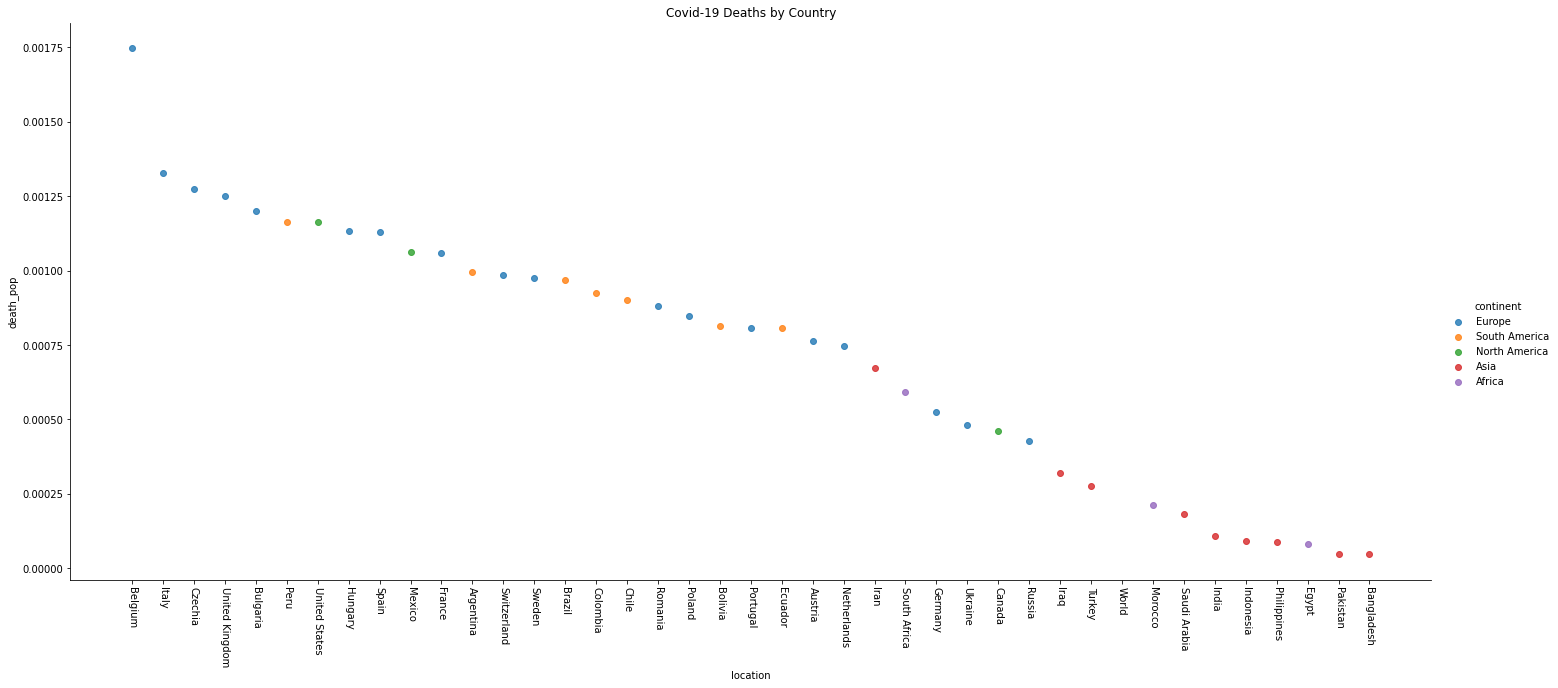

In [43]:
df_ord = df_short.sort_values(by='death_pop', ascending=False)

sns.lmplot(x='location', y='death_pop', data=df_ord,
           fit_reg=False, # No regression line
           hue='continent', height=8.27, aspect=20/8.27)   # Color by continent

# Set title with matplotlib
plt.title('Covid-19 Deaths by Country')
# Rotate x-labels
plt.xticks(rotation=-90);

# Filter by pop size over 3 million  
Ordered by total deaths per million  
This enables us to look at the countries that did the worst containment of Covid 19 as well as the best given there population.

<Figure size 2160x1440 with 0 Axes>

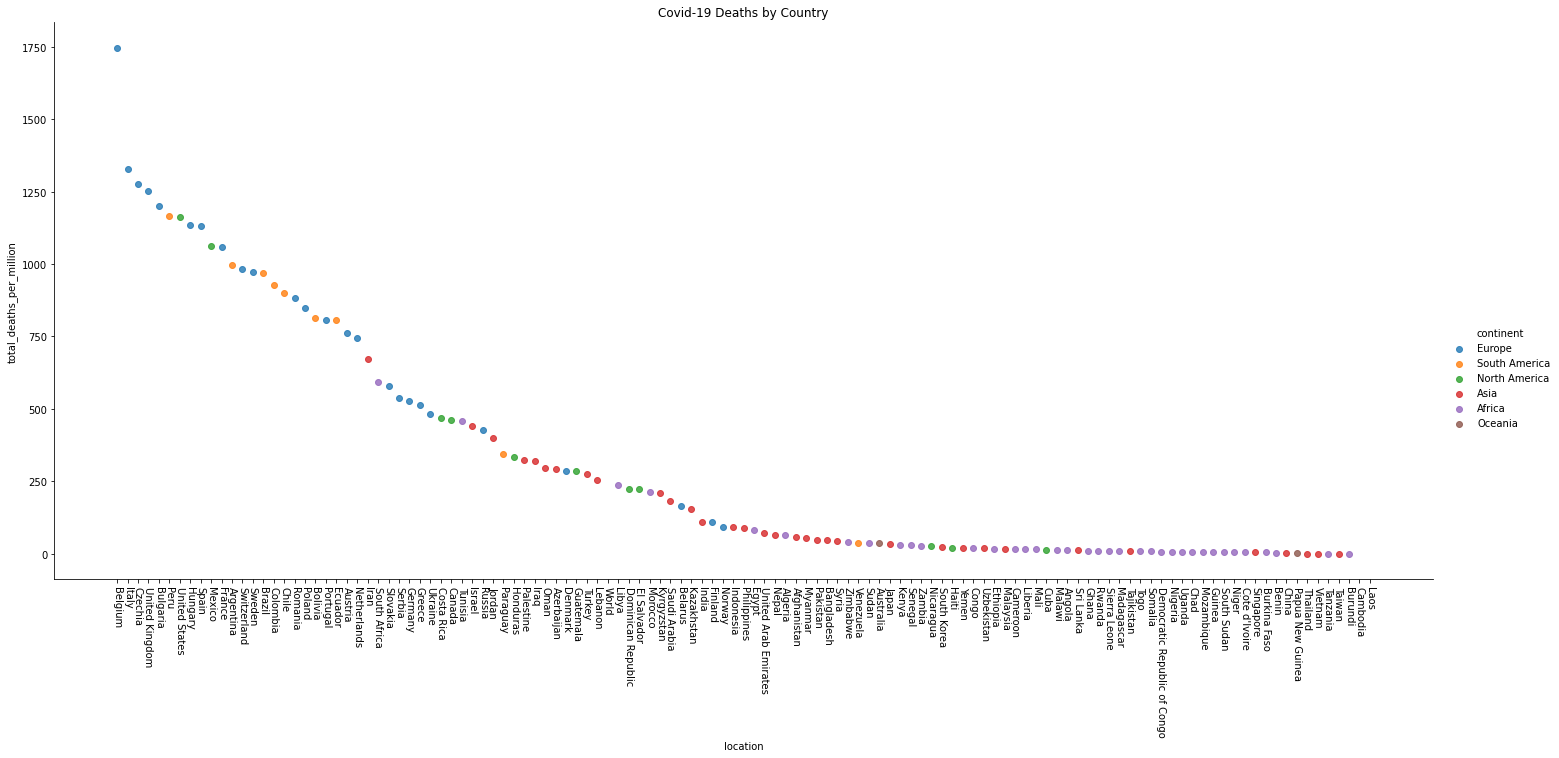

In [44]:

df_pop = dfpop.loc[:, ('date', 'location', 'total_deaths', 'continent', 'population', 'total_deaths_per_million')]
df_pop['death_pop'] = df_pop['total_deaths']/df_pop['population']

df_pop = df_pop.sort_values(by='total_deaths_per_million', ascending=False)
plt.figure(figsize=(30,20))

sns.lmplot(x='location', y='total_deaths_per_million', data=df_pop,
           fit_reg=False, # No regression line
           hue='continent', height=8.27, aspect=20/8.27)   # Color by continent

# Set title with matplotlib
plt.title('Covid-19 Deaths by Country')
# Rotate x-labels
plt.xticks(rotation=-90);